In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
import scanpy as sc
import anndata

#import ot
%matplotlib inline

Import MOWGAN

In [2]:
from MOWGAN.preprocessing import preprocessing
from MOWGAN.train import train
import MOWGAN.restart

/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/numba/cpython/hashing.py:484: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


 ## Load your data

In [3]:
path1 = '/Volumes/GoogleDrive/My Drive/PBMC/'

atac = sc.read(path1+'atac_test_MOWGAN.h5ad')
rna = sc.read(path1+'rna_test_MOWGAN.h5ad')

Data must be preprocessed. There should be the slot *.obsm['X_**'] with the embedding we wish to use in the analysis. The embedding could be different for each modality.

In this tutorial, we will use the pca embedding --> anndata.obsm['X_pca']

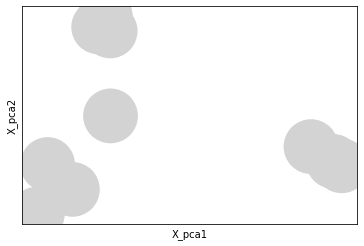

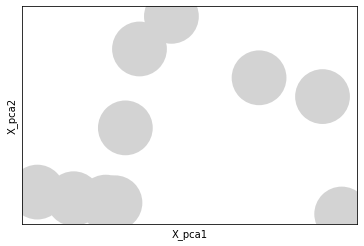

In [4]:
sc.pl.embedding(rna, basis='X_pca')

sc.pl.embedding(atac, basis='X_pca')

In [5]:
rna.obsm['X_pca'].shape, atac.obsm['X_pca'].shape

((10, 50), (10, 50))

In [6]:
train.train(adata1=rna, adata2=rna, adata1_query='X_pca', adata2_query='X_pca', n_dim=5, n_epochs=3)  

/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
2022-10-31 12:46:40.724609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-31 12:46:40.724703: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


  0%|                                                                                                                                       | 0/468 [00:00<?, ?it/s]2022-10-31 12:46:41.313489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-31 12:46:41.315541: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-31 12:46:41.315650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
  1%|█▋                                                                                                                              | 1/78 [00:00<00:05, 14.64it/s]


Epoch: 0 | disc_loss1: 3.8474788665771484 | gen_loss: -0.02100241929292679 


  1%|█▋                                                                                                                              | 1/78 [00:00<00:01, 64.28it/s]


Epoch: 1 | disc_loss1: 1.6976338624954224 | gen_loss: -0.13216173648834229 


  1%|█▋                                                                                                                              | 1/78 [00:00<00:01, 66.99it/s]


Epoch: 2 | disc_loss1: 1.1608434915542603 | gen_loss: -0.3643304109573364 


/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [7]:
p_1 = sc.read('adata1_MOWGAN.h5ad')
p_2 = sc.read('adata2_MOWGAN.h5ad')

In [8]:
p_1

AnnData object with n_obs × n_vars = 10 × 4696
    obsm: 'X_pca'

In [9]:
p_2

AnnData object with n_obs × n_vars = 10 × 4696
    obsm: 'X_pca'